##### Task 3(b): Take grayscale image of size 512x512, use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression & observe their performance in term of PSNR

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Function for Average Spatial Filter
##### Function: output_image = cv2.blur(input_image, (kernel_size, kernel_size))

In [2]:
def average_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset, weight = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            filtered_image[r, c] = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        filtered_image[r, c] += (image[r + x, c + y] / weight)
    
    return np.uint8(filtered_image)

In [3]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

##### Function for calculating PSNR (Peak Signal to Noise Ratio)
##### Function: psnr = cv2.PSNR(image1, image2)

In [4]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

##### Adding Salt & Pepper Noise to the Image

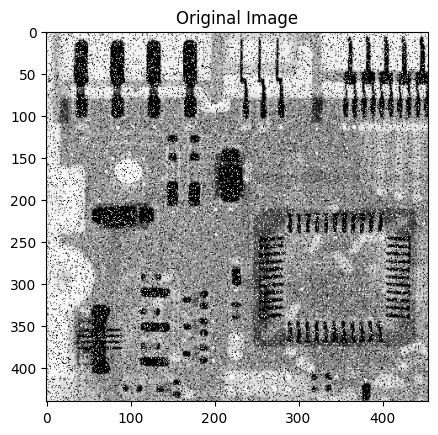

In [8]:
character_image = cv2.imread("./Noisy PCB 455x440.tif", 0)
plt.imshow(character_image, cmap = "gray")
plt.title("Original Image")
plt.show()

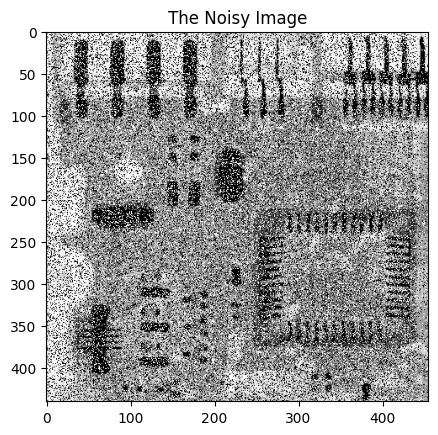

PSNR = 10.31


In [9]:
noisy_character_image = add_salt_pepper_noise(character_image, 15)
plt.imshow(noisy_character_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()
psnr = compute_psnr(character_image, noisy_character_image)
print(f"PSNR = {psnr}")

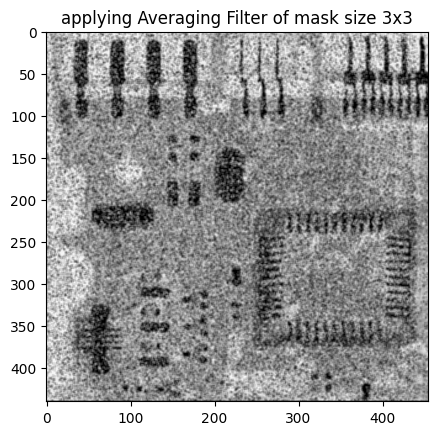

PSNR = 9.68


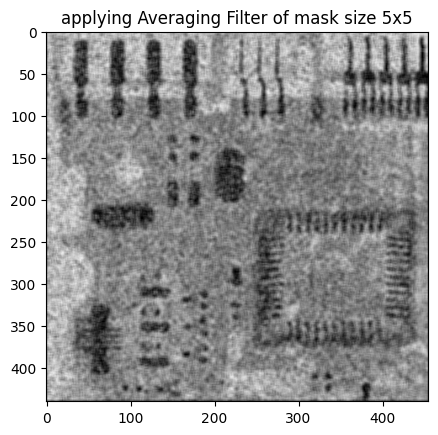

PSNR = 9.25


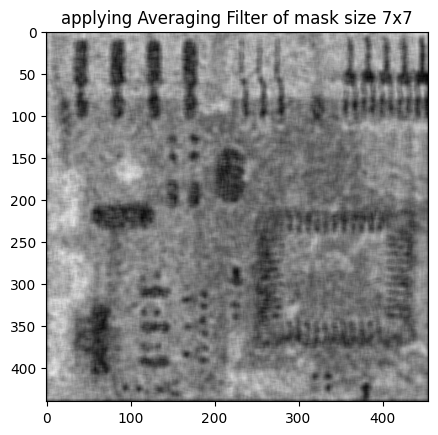

PSNR = 8.96


In [10]:
for mask_size in range(3, 8, 2):
    avg_character_image = average_filter(noisy_character_image, mask_size)
    plt.imshow(cv2.cvtColor(avg_character_image, cv2.COLOR_BGR2RGB))
    plt.title(f"applying Averaging Filter of mask size {mask_size}x{mask_size}")
    plt.show()
    print(f"PSNR = {compute_psnr(noisy_character_image, avg_character_image)}")